In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id"
)

# Display sample data
print("Shape:", market_data_df.shape)
market_data_df.head(10)

Shape: (41, 7)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler_model = StandardScaler()

market_data_scaled = scaler_model.fit_transform(market_data_df)

print("Shape:", market_data_scaled.shape)
market_data_scaled[:2]

Shape: (41, 7)


array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211]])

In [7]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(
    market_data_scaled,
    columns=market_data_df.columns,
    index=market_data_df.index
)

# Copy the crypto names from the original data
# market_data_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
# market_data_scaled_df.set_index("coin_id", inplace=True)

# Display sample data
print("Shape:", market_data_scaled_df.shape)
market_data_scaled_df.head()

Shape: (41, 7)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Extra: Create an empty list to store the Calinski-Harabasz Index values
score = []

# Create a for loop to compute the inertia with each possible value of k
for index in k:

    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=index, n_init="auto", random_state=1)

    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(market_data_scaled_df)

    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

    # Extra: Compute the Calinski-Harabasz Index for each k
    if index != 1:
        # If k is not 1, compute the Calinski-Harabasz Index
        labels = model.labels_
        score_kmeans = metrics.calinski_harabasz_score(market_data_scaled_df, labels)
    else:
        # If k is 1, set the Calinski-Harabasz Index to None
        score_kmeans = None
    
    # Append the score to the score list
    score.append(score_kmeans)


# Create a dictionary with the data to plot the Elbow curve and see the Calinski-Harabasz Index
elbow_data = {"k": k, "inertia": inertia, "calinski_score": score}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(
    elbow_data,
)

# Set the "k" column as the index
df_elbow.set_index("k", inplace=True)

# Display the DataFrame
print("Shape:", df_elbow.shape)
df_elbow

Shape: (10, 2)


,inertia,calinski_score
k,,
1,287.000000,NaN
2,212.123342,13.766470
3,165.136752,14.021117
4,79.022435,32.459853
5,66.413051,29.892958
6,61.634088,25.595599
7,46.074467,29.631263
8,43.392694,26.466078
9,32.913223,30.879599


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Inertia'>

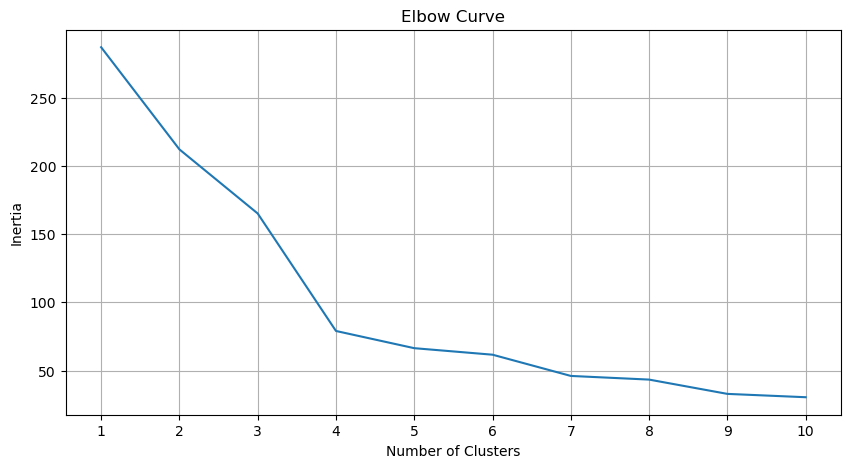

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    y="inertia",
    title="Elbow Curve",
    xticks=k,
    xlabel="Number of Clusters",
    ylabel="Inertia",
    grid=True,
    legend=False,
    figsize=(10, 5)
)


In [10]:
k = elbow_data["k"]
inertia = elbow_data["inertia"]

for index in range(1, len(inertia)):
    percent_decrease = ((inertia[index - 1] - inertia[index]) / inertia[index - 1]) * 100
    print(f"K{k[index - 1]} to K{k[index]} | % Decrease = {percent_decrease:.2f}%")

K1 to K2 | % Decrease = 26.09%
K2 to K3 | % Decrease = 22.15%
K3 to K4 | % Decrease = 52.15%
K4 to K5 | % Decrease = 15.96%
K5 to K6 | % Decrease = 7.20%
K6 to K7 | % Decrease = 25.25%
K7 to K8 | % Decrease = 5.82%
K8 to K9 | % Decrease = 24.15%
K9 to K10 | % Decrease = 7.43%


In [11]:
df_elbow[["calinski_score"]].style.highlight_max(
    color="black",
    axis=0,
)

,calinski_score
k,
1,nan
2,13.766470
3,14.021117
4,32.459853
5,29.892958
6,25.595599
7,29.631263
8,26.466078
9,30.879599


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(
    n_clusters=4,
    n_init="auto",
    random_state=1
)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
market_data_predictions = market_data_scaled_df.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions["crypto_cluster"] = crypto_clusters

# Display sample data
print("Shape:", market_data_predictions.shape)
market_data_predictions.head()

Shape: (41, 8)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


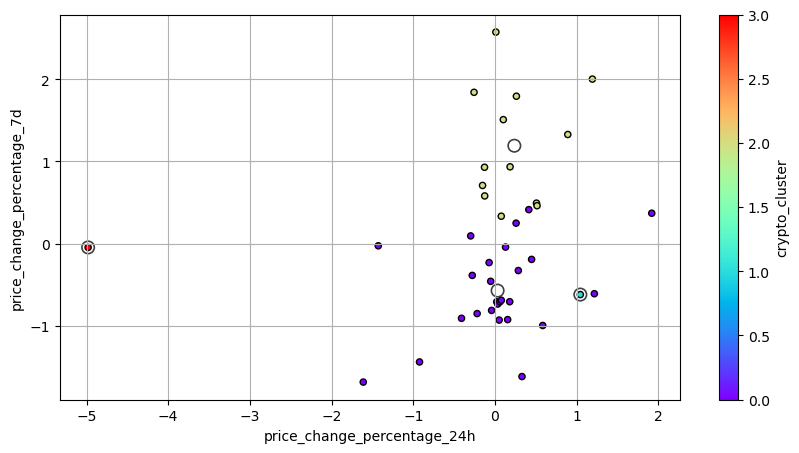

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

x_values = "price_change_percentage_24h"
y_values = "price_change_percentage_7d"

ax = market_data_predictions.plot.scatter(
    x=x_values,
    y=y_values,
    c="crypto_cluster",
    colormap="rainbow",
    edgecolor="black",
    figsize=(10, 5),
    grid=True
)

centroids = market_data_predictions.groupby("crypto_cluster")[[x_values, y_values]].mean().values

ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=80,
    facecolors='none',
    edgecolors="black",
    linewidths=1.2,
    alpha=0.75,
)

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(
    n_components=3
)

pca

PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
print("Shape:", market_data_pca.shape)
market_data_pca[:5]

Shape: (41, 3)


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [20]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [21]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    data=market_data_pca,
    columns=["PCA1", "PCA2", "PCA3"],
    index=market_data_scaled_df.index
)

# Copy the crypto names from the original data
# market_data_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
# market_data_pca_df.set_index("coin_id", inplace=True)

# Display sample data
print("Shape:", market_data_pca_df.shape)
market_data_pca_df.head(10)

Shape: (41, 3)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for index in k:
    
        # 1. Create a KMeans model using the loop counter for the n_clusters
        model = KMeans(n_clusters=index, n_init="auto", random_state=1)
    
        # 2. Fit the model to the data using PCA DataFrame
        model.fit(market_data_pca_df)
    
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(
    elbow_data,
)

# Set the "k" column as the index
df_elbow.set_index("k", inplace=True)

# Display the DataFrame
print("Shape:", df_elbow.shape)
df_elbow

Shape: (10, 1)


,inertia
k,
1,256.874086
2,182.339530
3,135.442408
4,49.665497
5,38.672582
6,34.507577
7,23.728365
8,18.574523
9,15.572672


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Inertia'>

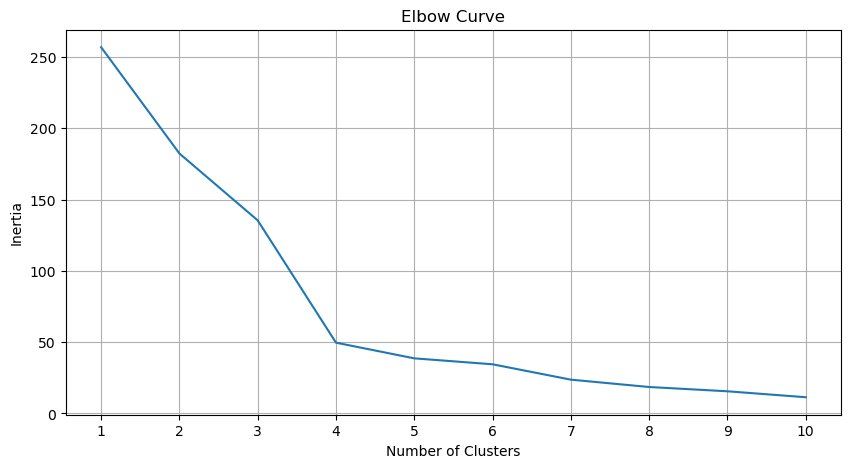

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow.plot.line(
    y="inertia",
    title="Elbow Curve",
    xticks=k,
    xlabel="Number of Clusters",
    ylabel="Inertia",
    grid=True,
    legend=False,
    figsize=(10, 5)
)


In [24]:
k = elbow_data["k"]
inertia = elbow_data["inertia"]

for index in range(1, len(inertia)):
    percent_decrease = ((inertia[index - 1] - inertia[index]) / inertia[index - 1]) * 100
    print(f"K{k[index - 1]} to K{k[index]} | % Decrease = {percent_decrease:.2f}%")

K1 to K2 | % Decrease = 29.02%
K2 to K3 | % Decrease = 25.72%
K3 to K4 | % Decrease = 63.33%
K4 to K5 | % Decrease = 22.13%
K5 to K6 | % Decrease = 10.77%
K6 to K7 | % Decrease = 31.24%
K7 to K8 | % Decrease = 21.72%
K8 to K9 | % Decrease = 16.16%
K9 to K10 | % Decrease = 26.75%


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(
    n_clusters=4,
    n_init="auto",
    random_state=1
)

In [26]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

KMeans(n_clusters=4, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [28]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_predictions = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_predictions["crypto_cluster"] = crypto_clusters

# Display sample data
print("Shape:", market_data_pca_predictions.shape)
market_data_pca_predictions.head()

Shape: (41, 4)


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


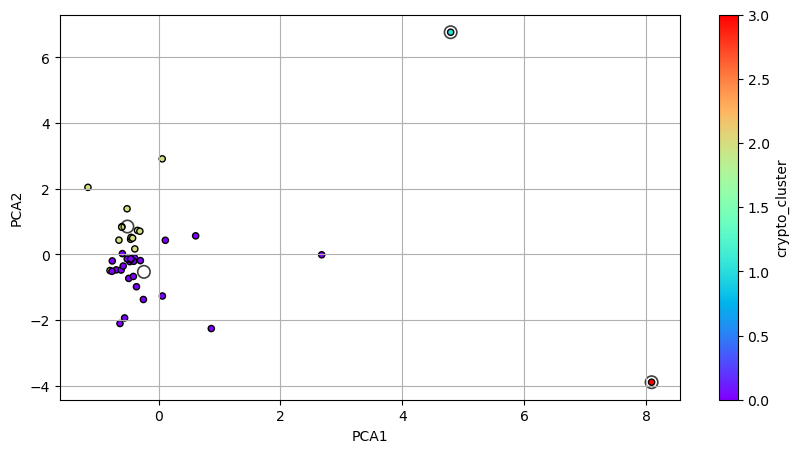

In [29]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
x_values = "PCA1"
y_values = "PCA2"

ax = market_data_pca_predictions.plot.scatter(
    x=x_values,
    y=y_values,
    c="crypto_cluster",
    colormap="rainbow",
    edgecolor="black",
    figsize=(10, 5),
    grid=True
)

centroids = market_data_pca_predictions.groupby("crypto_cluster")[[x_values, y_values]].mean().values

ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=80,
    facecolors='none',
    edgecolors="black",
    linewidths=1.2,
    alpha=0.75,
)

### Determine the Weights of Each Feature on each Principal Component

In [36]:
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [56]:
def highlight_max_min(s):
    styles = []
    column_name = s.name
    
    if column_name in ['PCA1', 'PCA2']:
        max_values = s.nlargest(2)
    else:
        max_values = s.nlargest(1)
    
    min_value = s.min()
    
    for value in s:
        if value in max_values.values:
            styles.append('background-color: black')
        elif value == min_value:
            styles.append('background-color: gray')
        else:
            styles.append('')
    
    return styles

In [57]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(
    pca.components_.T,
    columns=["PCA1", "PCA2", "PCA3"],
    index=market_data_scaled_df.columns
)

print("Shape:", pca_component_weights.shape)
pca_component_weights.style.apply(highlight_max_min)

Shape: (7, 3)


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


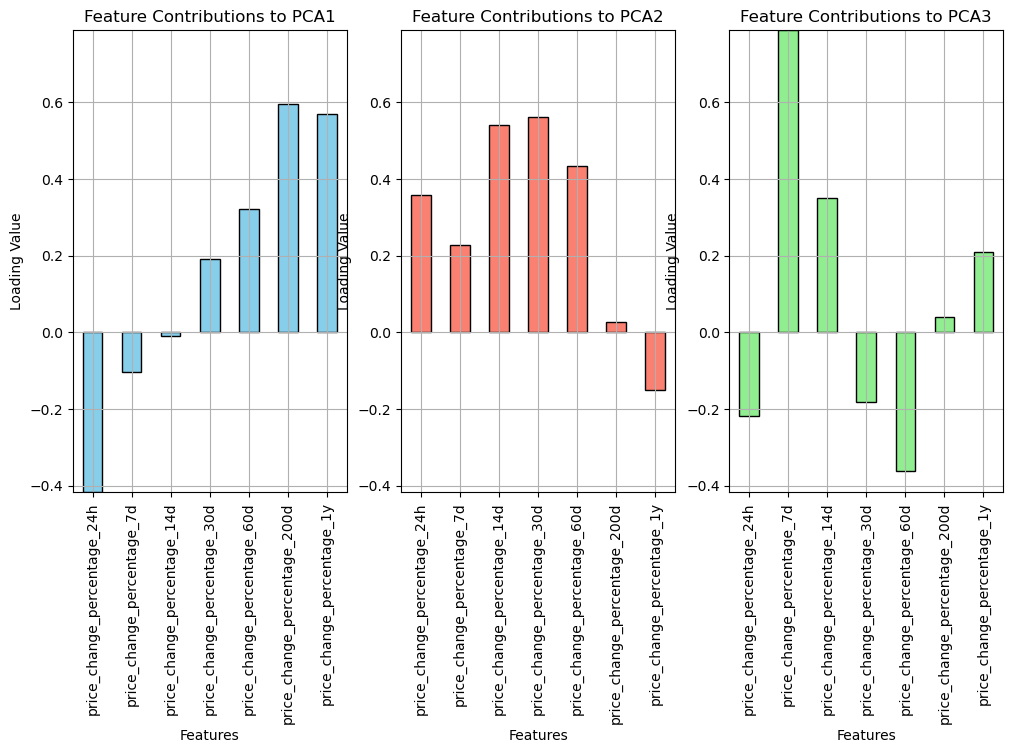

In [61]:
y_min = pca_component_weights[['PCA1', 'PCA2', 'PCA3']].min().min()
y_max = pca_component_weights[['PCA1', 'PCA2', 'PCA3']].max().max()

axes = pca_component_weights[['PCA1', 'PCA2', 'PCA3']].plot(
    kind='bar', 
    subplots=True, 
    layout=(1, 3), 
    figsize=(12, 6),
    edgecolor='black',
    color=["skyblue", "salmon", "lightgreen"],
    legend=False,
    grid=True,
    ylim=(y_min, y_max) 
    )

titles = ['Feature Contributions to PCA1', 'Feature Contributions to PCA2', 'Feature Contributions to PCA3']

for i, ax in enumerate(axes.flatten()):
    ax.set_title(titles[i])
    ax.set_ylabel('Loading Value')
    ax.set_xlabel('Features')

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    